In [1]:
import obspy 
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
import time

In [2]:
iq_lats = pd.read_csv('icequakes_catalog.csv')['latitude']
iq_lons = pd.read_csv('icequakes_catalog.csv')['longitude']

eq_lats = pd.read_csv('earthquakes_catalog.csv')['latitude']
eq_lons = pd.read_csv('earthquakes_catalog.csv')['longitude']

stns = pd.read_csv('gmap-stations.txt', sep='|', skiprows=[2,6])


stations = stns.values[:,1].astype('str')
stn_lats = stns.values[:,2].astype('float')
stn_lons = stns.values[:,3].astype('float')
gl_lat, gl_lon = 61.219722, -146.895278

In [3]:
stns = pd.read_csv('gmap-stations.txt', sep='|', skiprows=[2,6])
stns

,#Network,Station,Latitude,Longitude,Elevation,Sitename,StartTime,EndTime
0,AK,BAE,61.131900,-148.123400,578.0,"Barry Arm East, AK, USA",2020-09-04T00:00:00,2599-12-31T23:59:59
1,AK,BAT,61.141600,-148.175100,1027.0,"Barry Arm Top, AK, USA",2021-07-23T00:00:00,2599-12-31T23:59:59
2,AK,BAW,61.150100,-148.150100,542.0,"Barry Arm West, AK, USA",2020-09-04T00:00:00,2021-04-30T23:59:59
3,AK,EYAK,60.548698,-145.750000,133.9,"Cordova Ski Area, AK, USA",2002-10-03T00:00:00,2599-12-31T23:59:59
4,AK,FID,60.727699,-146.598694,500.0,"Fidalgo, AK, USA",2010-07-26T00:00:00,2599-12-31T23:59:59
5,AK,GLI,60.879200,-147.095901,430.0,"Glacier Island, AK, USA",2010-07-26T00:00:00,2599-12-31T23:59:59
6,AK,HIN,60.396000,-146.503494,622.9,"Hinchinbrook, AK, USA",2009-11-01T00:00:00,2599-12-31T23:59:59
7,AK,KLU,61.492400,-145.922700,1047.1,"Klutina Pass, AK, USA",2008-09-13T00:00:00,2599-12-31T23:59:59
8,AK,KNK,61.413100,-148.458500,598.0,"Knik Glacier, AK, USA",2010-06-13T00:00:00,2599-12-31T23:59:59
9,AK,M23K,61.792900,-147.726200,583.0,"Glacier View, AK, USA",2020-04-17T00:00:00,2599-12-31T23:59:59


In [ ]:
def forest_test(X, Y, n_estimators= 50):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    #X_train_fs, X_test_fs, fs = select_features(X_Train, Y_Train, X_Test)
    
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=n_estimators).fit(X_Train,Y_Train)
    dur = time.process_time() - start
    predictionforest = trainedforest.predict(X_Test)
    #print(confusion_matrix(Y_Test,predictionforest))
    #print(classification_report(Y_Test,predictionforest))
    acc = accuracy_score(Y_Test, predictionforest)
    
    return acc, dur

In [38]:
importances = []
start_time = time.time()
for i in tqdm(range(len(stations))):
    X = np.loadtxt("/home/aakash/Desktop/Reference_Papers/Icequakes_Vs_Tectonicquakes/spectrum_features/"+stations[i]+".txt")
    y = np.loadtxt("/home/aakash/Desktop/Reference_Papers/Icequakes_Vs_Tectonicquakes/spectrum_features/"+stations[i]+"_labels.txt")
    X_Train, X_Test, y_Train, y_Test = train_test_split(X[:,0:7500], y, test_size = 0.30, random_state = 101)
    forest = RandomForestClassifier(random_state=0, n_estimators=50).fit(X_Train, y_Train)
    importances.append(forest.feature_importances_)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [11:11<00:00, 44.78s/it]

Elapsed time to compute the importances: 671.753 seconds


In [39]:
import seaborn as sns

In [54]:
importances_norm = []

for i in range(len(importances)):
    importances_norm.append(importances[i]/np.max(importances[i]))

Text(0.5, 1.0, 'Feature Importance')

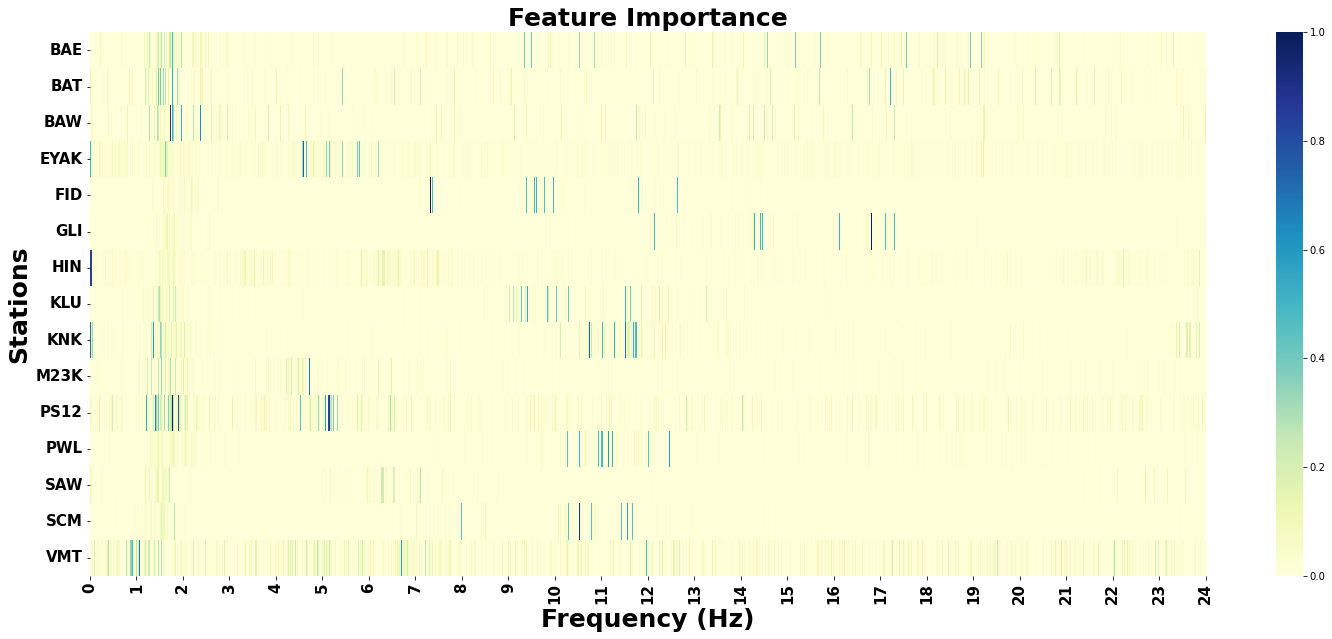

In [81]:
plt.rcParams['axes.linewidth'] = 2
feature_importance = pd.DataFrame(importances_norm, columns=freq[0:7500])
plt.figure(figsize=[25,10])
ax = sns.heatmap(feature_importance, cmap="YlGnBu", linewidth=0.0005)
ax.set_xticks(np.linspace(0,7500,25))
ax.set_xticklabels([str(i) for i in range(25)], fontsize=15, fontweight='bold')
ax.set_yticklabels(stations, fontsize=15, fontweight='bold', rotation=0)
ax.set_xlabel('Frequency (Hz)', fontsize=25, fontweight='bold')
ax.set_ylabel('Stations', fontsize=25, fontweight='bold')
ax.set_title('Feature Importance', fontsize=25, fontweight='bold')

In [97]:
feature_i = feature_importance.values
smoothed_fi = []

for i in range(len(feature_importance)):
    win_sum = []
    for j in range(0,len(feature_i[i]), 150):
            win_sum.append(np.sum(feature_i[i,j:j+150])/150)
    smoothed_fi.append(win_sum)
            
            
    

In [100]:
smoothed_fi = np.array(smoothed_fi)

Text(0.5, 1.0, 'Feature Importance')

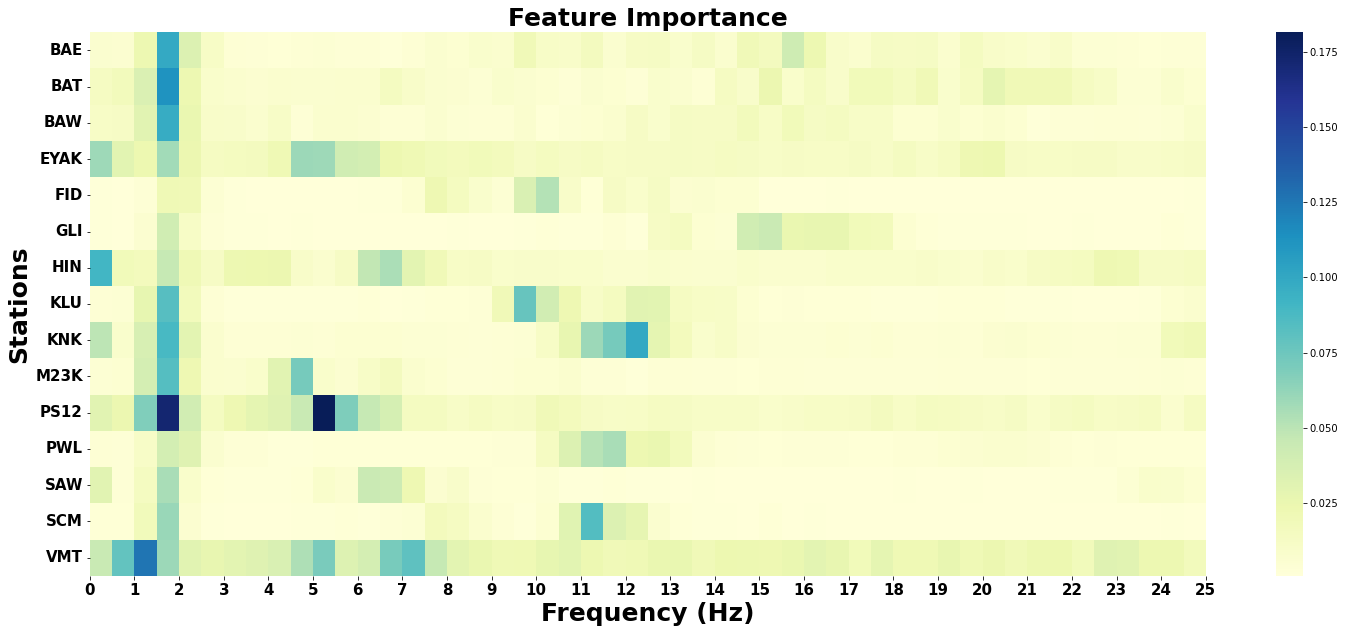

In [105]:
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=[25,10],facecolor='white')
ax = sns.heatmap(smoothed_fi, cmap="YlGnBu", linewidth=0.0005)
ax.set_xticks(np.linspace(0,50,26))
ax.set_xticklabels([str(i) for i in range(26)], fontsize=15, fontweight='bold')
ax.set_yticklabels(stations, fontsize=15, fontweight='bold', rotation=0)
ax.set_xlabel('Frequency (Hz)', fontsize=25, fontweight='bold')
ax.set_ylabel('Stations', fontsize=25, fontweight='bold')
ax.set_title('Feature Importance', fontsize=25, fontweight='bold')

In [112]:
freq[300:4501]

array([  1.        ,   1.00333333,   1.00666667, ...,  14.99333333,
        14.99666667,  15.        ])

### Computing the accuracy with reduced number of features

In [114]:
acc_1_2 = []
acc_1_10 = []
acc_1_15 = [] 
acc_all = []
start_time = time.time()
for i in tqdm(range(len(stations))):
    X = np.loadtxt("/home/aakash/Desktop/Reference_Papers/Icequakes_Vs_Tectonicquakes/spectrum_features/"+stations[i]+".txt")
    y = np.loadtxt("/home/aakash/Desktop/Reference_Papers/Icequakes_Vs_Tectonicquakes/spectrum_features/"+stations[i]+"_labels.txt")
    
    acc_1_2.append(forest_test(X[:,300:601],y, n_estimators= 50))
    acc_1_10.append(forest_test(X[:,300:3001],y, n_estimators= 50))
    acc_1_15.append(forest_test(X[:,300:4501],y, n_estimators= 50))
    acc_all.append(forest_test(X[:,0:7500],y, n_estimators= 50))
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

  0%|                                                                                                                                                                               | 0/15 [00:00<?, ?it/s]

[[200   8]
 [ 59  20]]
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86       208
         1.0       0.71      0.25      0.37        79

    accuracy                           0.77       287
   macro avg       0.74      0.61      0.62       287
weighted avg       0.76      0.77      0.72       287

[[202   6]
 [ 36  43]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       208
         1.0       0.88      0.54      0.67        79

    accuracy                           0.85       287
   macro avg       0.86      0.76      0.79       287
weighted avg       0.86      0.85      0.84       287

[[204   4]
 [ 35  44]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       208
         1.0       0.92      0.56      0.69        79

    accuracy                           0.86       287
   macro avg       0.89      0.77      0.80       287
weigh

  7%|███████████▏                                                                                                                                                           | 1/15 [00:14<03:18, 14.18s/it]

[[204   4]
 [ 35  44]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       208
         1.0       0.92      0.56      0.69        79

    accuracy                           0.86       287
   macro avg       0.89      0.77      0.80       287
weighted avg       0.87      0.86      0.85       287

[[154   3]
 [ 35  16]]
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       157
         1.0       0.84      0.31      0.46        51

    accuracy                           0.82       208
   macro avg       0.83      0.65      0.67       208
weighted avg       0.82      0.82      0.78       208

[[152   5]
 [ 31  20]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89       157
         1.0       0.80      0.39      0.53        51

    accuracy                           0.83       208
   macro avg       0.82      0.68      0.71       208
weigh

 13%|██████████████████████▎                                                                                                                                                | 2/15 [00:24<02:33, 11.80s/it]

[[152   5]
 [ 26  25]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       157
         1.0       0.83      0.49      0.62        51

    accuracy                           0.85       208
   macro avg       0.84      0.73      0.76       208
weighted avg       0.85      0.85      0.84       208

[[95  3]
 [28  9]]
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86        98
         1.0       0.75      0.24      0.37        37

    accuracy                           0.77       135
   macro avg       0.76      0.61      0.61       135
weighted avg       0.77      0.77      0.72       135

[[90  8]
 [21 16]]
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        98
         1.0       0.67      0.43      0.52        37

    accuracy                           0.79       135
   macro avg       0.74      0.68      0.69       135
weighted avg 

 20%|█████████████████████████████████▍                                                                                                                                     | 3/15 [00:30<01:50,  9.19s/it]

[[93  5]
 [18 19]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        98
         1.0       0.79      0.51      0.62        37

    accuracy                           0.83       135
   macro avg       0.81      0.73      0.76       135
weighted avg       0.83      0.83      0.82       135

[[761 121]
 [405 347]]
              precision    recall  f1-score   support

         0.0       0.65      0.86      0.74       882
         1.0       0.74      0.46      0.57       752

    accuracy                           0.68      1634
   macro avg       0.70      0.66      0.66      1634
weighted avg       0.69      0.68      0.66      1634

[[763 119]
 [351 401]]
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.76       882
         1.0       0.77      0.53      0.63       752

    accuracy                           0.71      1634
   macro avg       0.73      0.70      0.70      1634
weighted 

 27%|████████████████████████████████████████████▌                                                                                                                          | 4/15 [02:04<07:50, 42.77s/it]

[[787  95]
 [317 435]]
              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79       882
         1.0       0.82      0.58      0.68       752

    accuracy                           0.75      1634
   macro avg       0.77      0.74      0.74      1634
weighted avg       0.76      0.75      0.74      1634

[[552  65]
 [172 388]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       617
         1.0       0.86      0.69      0.77       560

    accuracy                           0.80      1177
   macro avg       0.81      0.79      0.79      1177
weighted avg       0.81      0.80      0.80      1177

[[595  22]
 [ 39 521]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       617
         1.0       0.96      0.93      0.94       560

    accuracy                           0.95      1177
   macro avg       0.95      0.95      0.95      1177
weigh

 33%|███████████████████████████████████████████████████████▋                                                                                                               | 5/15 [03:06<08:16, 49.65s/it]

[[594  23]
 [ 41 519]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       617
         1.0       0.96      0.93      0.94       560

    accuracy                           0.95      1177
   macro avg       0.95      0.94      0.95      1177
weighted avg       0.95      0.95      0.95      1177

[[720 128]
 [273 374]]
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.78       848
         1.0       0.75      0.58      0.65       647

    accuracy                           0.73      1495
   macro avg       0.74      0.71      0.72      1495
weighted avg       0.73      0.73      0.73      1495

[[820  28]
 [ 46 601]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       848
         1.0       0.96      0.93      0.94       647

    accuracy                           0.95      1495
   macro avg       0.95      0.95      0.95      1495
weigh

 40%|██████████████████████████████████████████████████████████████████▊                                                                                                    | 6/15 [04:34<09:23, 62.58s/it]

[[818  30]
 [ 41 606]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       848
         1.0       0.95      0.94      0.94       647

    accuracy                           0.95      1495
   macro avg       0.95      0.95      0.95      1495
weighted avg       0.95      0.95      0.95      1495

[[795  76]
 [382 220]]
              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78       871
         1.0       0.74      0.37      0.49       602

    accuracy                           0.69      1473
   macro avg       0.71      0.64      0.63      1473
weighted avg       0.70      0.69      0.66      1473

[[791  80]
 [216 386]]
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84       871
         1.0       0.83      0.64      0.72       602

    accuracy                           0.80      1473
   macro avg       0.81      0.77      0.78      1473
weigh

 47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                         | 7/15 [05:53<09:04, 68.05s/it]

[[769 102]
 [128 474]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       871
         1.0       0.82      0.79      0.80       602

    accuracy                           0.84      1473
   macro avg       0.84      0.84      0.84      1473
weighted avg       0.84      0.84      0.84      1473

[[789  85]
 [288 348]]
              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81       874
         1.0       0.80      0.55      0.65       636

    accuracy                           0.75      1510
   macro avg       0.77      0.72      0.73      1510
weighted avg       0.76      0.75      0.74      1510

[[822  52]
 [ 49 587]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       874
         1.0       0.92      0.92      0.92       636

    accuracy                           0.93      1510
   macro avg       0.93      0.93      0.93      1510
weigh

 53%|█████████████████████████████████████████████████████████████████████████████████████████                                                                              | 8/15 [07:15<08:27, 72.43s/it]

[[823  51]
 [ 48 588]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       874
         1.0       0.92      0.92      0.92       636

    accuracy                           0.93      1510
   macro avg       0.93      0.93      0.93      1510
weighted avg       0.93      0.93      0.93      1510

[[725 190]
 [228 453]]
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       915
         1.0       0.70      0.67      0.68       681

    accuracy                           0.74      1596
   macro avg       0.73      0.73      0.73      1596
weighted avg       0.74      0.74      0.74      1596

[[836  79]
 [103 578]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       915
         1.0       0.88      0.85      0.86       681

    accuracy                           0.89      1596
   macro avg       0.89      0.88      0.88      1596
weigh

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 9/15 [08:46<07:49, 78.27s/it]

[[841  74]
 [ 69 612]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       915
         1.0       0.89      0.90      0.90       681

    accuracy                           0.91      1596
   macro avg       0.91      0.91      0.91      1596
weighted avg       0.91      0.91      0.91      1596

[[415   8]
 [ 90  48]]
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       423
         1.0       0.86      0.35      0.49       138

    accuracy                           0.83       561
   macro avg       0.84      0.66      0.69       561
weighted avg       0.83      0.83      0.80       561

[[405  18]
 [ 39  99]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       423
         1.0       0.85      0.72      0.78       138

    accuracy                           0.90       561
   macro avg       0.88      0.84      0.86       561
weigh

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 10/15 [09:15<05:15, 63.16s/it]

[[410  13]
 [ 48  90]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       423
         1.0       0.87      0.65      0.75       138

    accuracy                           0.89       561
   macro avg       0.88      0.81      0.84       561
weighted avg       0.89      0.89      0.89       561

[[416   4]
 [ 89  43]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       420
         1.0       0.91      0.33      0.48       132

    accuracy                           0.83       552
   macro avg       0.87      0.66      0.69       552
weighted avg       0.85      0.83      0.80       552

[[411   9]
 [ 53  79]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       420
         1.0       0.90      0.60      0.72       132

    accuracy                           0.89       552
   macro avg       0.89      0.79      0.82       552
weigh

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 11/15 [09:47<03:33, 53.41s/it]

[[413   7]
 [ 66  66]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       420
         1.0       0.90      0.50      0.64       132

    accuracy                           0.87       552
   macro avg       0.88      0.74      0.78       552
weighted avg       0.87      0.87      0.85       552

[[563  96]
 [209 365]]
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       659
         1.0       0.79      0.64      0.71       574

    accuracy                           0.75      1233
   macro avg       0.76      0.75      0.75      1233
weighted avg       0.76      0.75      0.75      1233

[[608  51]
 [ 80 494]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       659
         1.0       0.91      0.86      0.88       574

    accuracy                           0.89      1233
   macro avg       0.90      0.89      0.89      1233
weigh

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 12/15 [10:55<02:53, 57.97s/it]

[[617  42]
 [ 80 494]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       659
         1.0       0.92      0.86      0.89       574

    accuracy                           0.90      1233
   macro avg       0.90      0.90      0.90      1233
weighted avg       0.90      0.90      0.90      1233

[[726 122]
 [169 575]]
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       848
         1.0       0.82      0.77      0.80       744

    accuracy                           0.82      1592
   macro avg       0.82      0.81      0.82      1592
weighted avg       0.82      0.82      0.82      1592

[[800  48]
 [ 44 700]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       848
         1.0       0.94      0.94      0.94       744

    accuracy                           0.94      1592
   macro avg       0.94      0.94      0.94      1592
weigh

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 13/15 [12:27<02:16, 68.33s/it]

[[809  39]
 [ 46 698]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       848
         1.0       0.95      0.94      0.94       744

    accuracy                           0.95      1592
   macro avg       0.95      0.95      0.95      1592
weighted avg       0.95      0.95      0.95      1592

[[797  89]
 [189 572]]
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       886
         1.0       0.87      0.75      0.80       761

    accuracy                           0.83      1647
   macro avg       0.84      0.83      0.83      1647
weighted avg       0.83      0.83      0.83      1647

[[853  33]
 [ 58 703]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       886
         1.0       0.96      0.92      0.94       761

    accuracy                           0.94      1647
   macro avg       0.95      0.94      0.94      1647
weigh

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 14/15 [13:59<01:15, 75.41s/it]

[[849  37]
 [ 60 701]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       886
         1.0       0.95      0.92      0.94       761

    accuracy                           0.94      1647
   macro avg       0.94      0.94      0.94      1647
weighted avg       0.94      0.94      0.94      1647

[[418   1]
 [125   7]]
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       419
         1.0       0.88      0.05      0.10       132

    accuracy                           0.77       551
   macro avg       0.82      0.53      0.48       551
weighted avg       0.80      0.77      0.68       551

[[415   4]
 [116  16]]
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       419
         1.0       0.80      0.12      0.21       132

    accuracy                           0.78       551
   macro avg       0.79      0.56      0.54       551
weigh

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [14:29<00:00, 58.00s/it]

[[417   2]
 [121  11]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       419
         1.0       0.85      0.08      0.15       132

    accuracy                           0.78       551
   macro avg       0.81      0.54      0.51       551
weighted avg       0.79      0.78      0.70       551

Elapsed time to compute the importances: 869.957 seconds


[(0.86411149825783973, 1.490537015999962),
 (0.85096153846153844, 1.0547952649999388),
 (0.82962962962962961, 0.4519665690002057),
 (0.74785801713586286, 13.110026586000004),
 (0.94562446898895502, 7.878240294000079),
 (0.95250836120401339, 13.987741481000057),
 (0.84385607603530211, 9.799910250000266),
 (0.93443708609271525, 9.99850503100015),
 (0.91040100250626566, 13.06961727199996),
 (0.89126559714795006, 3.547196030000123),
 (0.86775362318840576, 4.867526005999935),
 (0.90105433901054344, 9.90748998800018),
 (0.94660804020100497, 13.236781822000012),
 (0.94110503946569524, 13.429073399000117),
 (0.77676950998185113, 4.0747682229998645)]

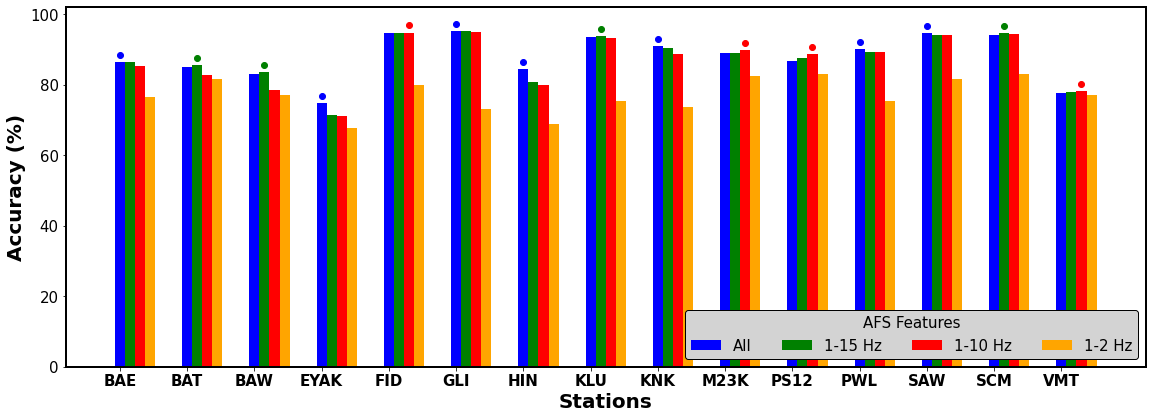

In [178]:
v = np.vstack((np.array(acc_all)[:,0],np.array(acc_1_15)[:,0], np.array(acc_1_10)[:,0],np.array(acc_1_2)[:,0]))
c= ['b','g','r','orange']
shift = [0.0, 0.15, 0.30, 0.45]
w = 0.15


X = np.arange(15)*1.0
fig = plt.figure(figsize=[15,5],facecolor = 'white')
ax = fig.add_axes([0,0,1,1])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.bar(X + 0.00, np.array(acc_all)[:,0]*100, color = 'b', width = w, label='All')
ax.bar(X + 0.15, np.array(acc_1_15)[:,0]*100, color = 'g', width = w, label='1-15 Hz')
ax.bar(X + 0.30, np.array(acc_1_10)[:,0]*100, color = 'r', width = w, label='1-10 Hz')
ax.bar(X + 0.45, np.array(acc_1_2)[:,0]*100, color = 'orange', width = w, label='1-2 Hz')

for i in range(15):
    plt.scatter(X[i]+shift[int(np.argmax(v[:,i]))], max(v[:,i])*100+2, c=c[int(np.argmax(v[:,i]))])


ax.set_xticks(X)
ax.set_xticklabels(stations, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=20, fontweight='bold')
ax.set_xlabel('Stations', fontsize=20, fontweight='bold')
ax.legend(ncol=4, fontsize=15, loc='lower right', framealpha=1, facecolor='lightgray', edgecolor='k', title='AFS Features',
         title_fontsize=15)